In [1]:
%matplotlib inline
import cv2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
# https://docs.google.com/document/d/1OOhlIe1j3hthFhviC9TfcgT-rzGvUdvb9qnFFOioTSo/edit
# Выводы ТУТ

In [2]:
import os

In [3]:
def detect_match(algorithm,query_img,train_img,min_match_count,verbose=False):
    query_image = query_img
    train_image = train_img
    key_pts1,des1 = algorithm(query_image,None)
    key_pts2,des2 = algorithm(train_image,None)
    msed=np.inf
    if not (isinstance(des1,np.float32)&isinstance(des2,np.float32)):
        des1 = np.float32(des1)
        des2 = np.float32(des2)
    
    flann_idx = 1
    index_params = dict(algorithm = flann_idx, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = [m for m,n in matches if m.distance < 0.7*n.distance]
    
    if len(good)>min_match_count:
        src_pts = np.float32([ key_pts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ key_pts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        if M is None:
            return [0],[0],[0],[0],np.inf
        #print(M,mask)
        matchesMask = mask.ravel().tolist()
        h,w = query_image.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        msed = np.mean([np.sqrt(np.sum(diff)) for diff in (np.power(pts-dst,2))]/(np.sqrt(h**2+w**2)))
        #cv2.polylines(train_image,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        if verbose==True:
            print( "Not enough matches are found - {}/{}".format(len(good), min_match_count) )
        matchesMask = [0]
    
    return key_pts1, key_pts2, good, matchesMask, msed

def plot_match(query_img, train_img, key_pts1, key_pts2, good, matchesMask):
    draw_params = dict(matchColor = (255.0,255.0,255.0), # draw matches in white color
                   singlePointColor = (255.0,0,0),
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
    img3 = cv2.drawMatches(query_img, key_pts1, train_img, key_pts2, good, None, **draw_params)
    plt.imshow(img3, 'gray'),plt.show()

In [4]:
alg_dict=dict(sift=cv2.xfeatures2d.SIFT_create().detectAndCompute,
              surf=cv2.xfeatures2d.SURF_create(200).detectAndCompute)
min_matches=10

In [5]:
data_folder1 = os.path.join(os.curdir,'dayKvadr')
data_set1 = [os.path.join(data_folder1,file) for file in os.listdir(data_folder1) if os.path.isfile(os.path.join(data_folder1,file))]
data_folder2 = os.path.join(os.curdir,'dayPony')
data_set2 = [os.path.join(data_folder2,file) for file in os.listdir(data_folder2) if os.path.isfile(os.path.join(data_folder2,file))]


In [6]:
data_folder3 = os.path.join(os.curdir,'nightKvadr')
data_set3 = [os.path.join(data_folder3,file) for file in os.listdir(data_folder3) if os.path.isfile(os.path.join(data_folder3,file))]
data_folder4 = os.path.join(os.curdir,'nightPony')
data_set4 = [os.path.join(data_folder4,file) for file in os.listdir(data_folder4) if os.path.isfile(os.path.join(data_folder4,file))]


In [7]:
ponies = [cv2.imread(image,0) for image in data_set2]

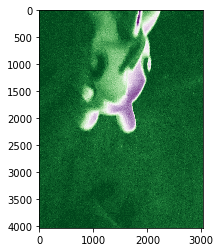

(<matplotlib.image.AxesImage at 0x1a5245e590>, None)

In [56]:
plt.imshow(poniesTest[5], 'PRGn_r'),plt.show()

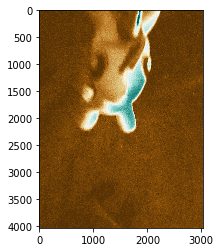

(<matplotlib.image.AxesImage at 0x1a5228ffd0>, None)

In [55]:
plt.imshow(poniesTest[5], 'BrBG'),plt.show()

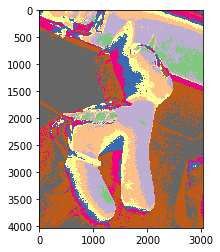

(<matplotlib.image.AxesImage at 0x1a52542f90>, None)

In [21]:
plt.imshow(ponies[0], 'Accent_r'),plt.show()

In [8]:
import itertools
import time
inliers_matches = dict()
indexes = list(itertools.product(alg_dict.keys(),["inliers/matches","distance MSE","time (s)"]))
for im_j_idx in range(len(ponies)):
    inliers_matches["img"+str(im_j_idx)]=list()

In [13]:
for alg_name, alg in alg_dict.items():
    for im_i_idx, image_i in enumerate(ponies):
        _, __, match, inlier ,msd = detect_match(algorithm=alg,query_img=image_i,train_img=ponies[13],
                                                     min_match_count=10)
        if match==0:
            match=np.inf
        inliers_matches["img"+str(im_i_idx)].append(np.sum(inlier)/(len(match)))
        

In [14]:
inliers_matches

{'img0': [0.5806451612903226,
  0.08426564,
  3.8704348070000094,
  0.48372093023255813,
  0.08428751,
  1.3214905909999857,
  0.5684210526315789,
  0.4608294930875576],
 'img1': [0.23076923076923078,
  0.5747218,
  3.903271817000018,
  0.2358490566037736,
  0.5455707,
  1.5223460610000075,
  0.1935483870967742,
  0.25],
 'img2': [0.2,
  0.5043442,
  3.826000265999994,
  0.1267605633802817,
  0.5453551,
  1.3981237500000248,
  0.22727272727272727,
  0.11538461538461539],
 'img3': [0.40350877192982454,
  0.077118084,
  4.029300832000018,
  0.3346613545816733,
  0.07293192,
  1.4394907180000018,
  0.35135135135135137,
  0.373015873015873],
 'img4': [0.4,
  2.861696,
  3.7952733029999877,
  0.15151515151515152,
  0.6074873,
  1.347955585999955,
  0.3333333333333333,
  0.14492753623188406],
 'img5': [0.25,
  0.5286355,
  3.7937933249999958,
  0.11666666666666667,
  0.51936686,
  1.330527329000006,
  0.26666666666666666,
  0.11666666666666667],
 'img6': [0.1702127659574468,
  0.50111574,
  

In [10]:
import pandas as pd
index = pd.MultiIndex.from_tuples(indexes,names=['algorithm','property'])
train_df=pd.DataFrame(inliers_matches,index=index)

In [12]:
inliers_matches

{'img0': [0.5806451612903226,
  0.08426564,
  3.8704348070000094,
  0.48372093023255813,
  0.08428751,
  1.3214905909999857],
 'img1': [0.23076923076923078,
  0.5747218,
  3.903271817000018,
  0.2358490566037736,
  0.5455707,
  1.5223460610000075],
 'img2': [0.2,
  0.5043442,
  3.826000265999994,
  0.1267605633802817,
  0.5453551,
  1.3981237500000248],
 'img3': [0.40350877192982454,
  0.077118084,
  4.029300832000018,
  0.3346613545816733,
  0.07293192,
  1.4394907180000018],
 'img4': [0.4,
  2.861696,
  3.7952733029999877,
  0.15151515151515152,
  0.6074873,
  1.347955585999955],
 'img5': [0.25,
  0.5286355,
  3.7937933249999958,
  0.11666666666666667,
  0.51936686,
  1.330527329000006],
 'img6': [0.1702127659574468,
  0.50111574,
  3.8852814169999874,
  0.09523809523809523,
  21.816866,
  1.4878691750000144],
 'img7': [0.2,
  0.5139169,
  3.865693198999992,
  0.08602150537634409,
  1.9249992,
  1.6234219980000262],
 'img8': [0.39759036144578314,
  0.07211596,
  3.8841384790000006,
 

In [11]:
train_df

img0      img1      img2      img3      img4  \
algorithm property                                                            
sift      inliers/matches  0.580645  0.230769  0.200000  0.403509  0.400000   
          distance MSE     0.084266  0.574722  0.504344  0.077118  2.861696   
          time (s)         3.870435  3.903272  3.826000  4.029301  3.795273   
surf      inliers/matches  0.483721  0.235849  0.126761  0.334661  0.151515   
          distance MSE     0.084288  0.545571  0.545355  0.072932  0.607487   
          time (s)         1.321491  1.522346  1.398124  1.439491  1.347956   

                               img5       img6      img7      img8      img9  \
algorithm property                                                             
sift      inliers/matches  0.250000   0.170213  0.200000  0.397590  0.473684   
          distance MSE     0.528636   0.501116  0.513917  0.072116  0.017386   
          time (s)         3.793793   3.885281  3.865693  3.884138  3.858467   
surf      inliers/matches  0.116667   0.095238  0.086022  0.441379  0.591241   
          distance MSE     0.519367  21.816866  1.924999  0.067623  0.017447   
          time (s)         1.330527   1.487869  1.623422  1.484669  1.436147   

                           ...     img37     img38     img39     img40  \
algorithm property         ...                                           
sift      inliers/matches  ...  0.424528  0.191489  0.156250  0.575758   
          distance MSE     ...  0.099289  0.500093  0.542736  0.043088   
          time (s)         ...  3.948499  3.914363  3.937083  3.881557   
surf      inliers/matches  ...  0.387560  0.142857  0.114754  0.440000   
          distance MSE     ...  0.063955  0.543892  0.538192  0.047522   
          time (s)         ...  1.523013  1.612502  1.711111  1.430197   

                              img41     img42     img43     img44     img45  \
algorithm property                                                            
sift      inliers/matches  0.485915  0.530864  0.145833  0.561224  0.206897   
          distance MSE     0.035185  0.056140  0.518736  0.070520  0.560302   
          time (s)         3.862517  3.905484  4.033036  3.965886  3.893491   
surf      inliers/matches  0.477064  0.372470  0.103704  0.355469  0.090909   
          distance MSE     0.035264  0.058164  0.537653  0.058238  0.527510   
          time (s)         1.458501  1.456546  1.617076  1.388132  1.710956   

                              img46  
algorithm property                   
sift      inliers/matches  0.535211  
          distance MSE     0.080923  
          time (s)         3.881437  
surf      inliers/matches  0.443750  
          distance MSE     0.076777  
          time (s)         1.380782  

[6 rows x 47 columns]

In [33]:
poniesTest = [cv2.imread(image,0) for image in data_set4]

In [60]:
inliers_matches_tpony = dict()
indexes = list(itertools.product(alg_dict.keys(),["inliers/matches","distance MSE","time (s)"]))
for im_j_idx in range(len(poniesTest)):
    inliers_matches_tpony["img"+str(im_j_idx)]=list()

In [61]:
for alg_name, alg in alg_dict.items():
    for im_i_idx, image_i in enumerate(poniesTest):
        time_start=time.monotonic()
        _, __, match, inlier ,msd = detect_match(algorithm=alg,query_img=image_i,train_img=poniesTest[13],
                                                     min_match_count=10)
        time_end=time.monotonic()
        if match==0:
            match=np.inf
        inliers_matches_tpony["img"+str(im_i_idx)].append(np.sum(inlier)/(len(match)))
        inliers_matches_tpony["img"+str(im_i_idx)].append(msd)
        inliers_matches_tpony["img"+str(im_i_idx)].append(time_end-time_start)

/Users/ed/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [62]:
index_tp = pd.MultiIndex.from_tuples(indexes,names=['algorithm','property'])
test_df=pd.DataFrame(inliers_matches_tpony,index=index_tp)

In [63]:
test_df

img0      img1      img2      img3      img4  \
algorithm property                                                            
sift      inliers/matches  0.571429  0.000000  0.000000  0.416667  0.000000   
          distance MSE     1.925766       inf       inf  0.523690       inf   
          time (s)         3.826506  3.728234  3.771061  3.757769  3.728700   
surf      inliers/matches  0.258065  0.326316  0.416667  0.369565  0.357143   
          distance MSE     0.559009  0.533362  1.713897  0.558990  0.744606   
          time (s)         0.870099  0.824323  0.793701  0.859339  0.806521   

                               img5      img6      img7      img8      img9  \
algorithm property                                                            
sift      inliers/matches       NaN  0.363636  0.000000  0.000000  0.277778   
          distance MSE          inf  0.567850       inf       inf  0.525744   
          time (s)         3.745003  3.772946  3.749141  3.766586  4.049017   
surf      inliers/matches  0.000000  0.200000  0.428571  0.000000  0.173913   
          distance MSE          inf  0.558945  1.084165       inf  0.579631   
          time (s)         0.781389  0.842098  0.774344  0.786458  0.900122   

                           ...     img22     img23     img24     img25  \
algorithm property         ...                                           
sift      inliers/matches  ...  0.571429  0.285714  0.666667       NaN   
          distance MSE     ...  0.787451  0.534415  0.527877       inf   
          time (s)         ...  3.843211  3.823348  3.838136  3.796307   
surf      inliers/matches  ...  0.228571  0.173333  0.269231  0.238095   
          distance MSE     ...  0.559007  0.579641  0.544911  0.544248   
          time (s)         ...  0.906285  0.888131  0.849124  0.827437   

                              img26     img27     img28     img29     img30  \
algorithm property                                                            
sift      inliers/matches       NaN  0.307692       NaN  0.000000  0.000000   
          distance MSE          inf  0.514632       inf       inf       inf   
          time (s)         3.784259  3.887275  3.798342  3.805947  4.286588   
surf      inliers/matches  0.000000  0.142857  0.571429  0.333333  0.281250   
          distance MSE          inf  0.543822  0.558910  1.235475  0.534601   
          time (s)         0.765699  0.918137  0.793163  0.835228  0.842144   

                              img31  
algorithm property                   
sift      inliers/matches  0.300000  
          distance MSE     0.565037  
          time (s)         4.221508  
surf      inliers/matches  0.276596  
          distance MSE     0.579632  
          time (s)         0.883002  

[6 rows x 32 columns]

In [111]:
day_kvadr = [cv2.imread(image,0) for image in data_set1]

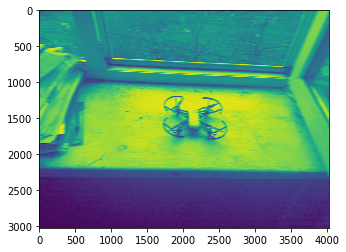

(<matplotlib.image.AxesImage at 0x1a725aaf90>, None)

In [78]:
plt.imshow(day_kvadr[5]),plt.show()

In [112]:
inliers_matches_kvadr = dict()
indexes = list(itertools.product(alg_dict.keys(),["inliers/matches","distance MSE","time (s)"]))
for im_j_idx in range(len(day_kvadr)):
    inliers_matches_kvadr["img"+str(im_j_idx)]=list()

In [ ]:
for alg_name, alg in alg_dict.items():
    for im_i_idx, image_i in enumerate(day_kvadr):
        time_start=time.monotonic()
        _, __, match, inlier ,msd = detect_match(algorithm=alg,query_img=image_i,train_img=day_kvadr[0],
                                                     min_match_count=10)
        time_end=time.monotonic()
        if match==0:
            match=np.inf
        inliers_matches_kvadr["img"+str(im_i_idx)].append(np.sum(inlier)/(len(match)))
        inliers_matches_kvadr["img"+str(im_i_idx)].append(msd)
        inliers_matches_kvadr["img"+str(im_i_idx)].append(time_end-time_start)

/Users/ed/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [100]:
index_dkvadr = pd.MultiIndex.from_tuples(indexes,names=['Descriptor','property'])
day_kvadr=pd.DataFrame(inliers_matches_kvadr,index=index_dkvadr)

In [101]:
day_kvadr

img0      img1      img2      img3  \
Descriptor property                                                      
sift       inliers/matches  1.000000e+00  0.181818  0.038462  0.028169   
           distance MSE     9.193421e-16  0.514828  0.505115  0.506782   
           time (s)         5.605377e+00  4.739186  6.018121  6.383028   
surf       inliers/matches  1.000000e+00  0.055556  0.024735  0.019774   
           distance MSE     6.148498e-16  0.934615  2.674214  0.618351   
           time (s)         2.507151e+00  3.623342  4.915583  5.937354   

                                img4      img5      img6      img7      img8  \
Descriptor property                                                            
sift       inliers/matches  0.046875  0.000000  0.497585  0.040462  0.065421   
           distance MSE     0.511865       inf  0.402740  0.493235  0.534817   
           time (s)         5.763586  4.426986  5.088982  6.934590  6.277332   
surf       inliers/matches  0.039683  0.241379  0.103261  0.025180  0.026923   
           distance MSE     0.578260  0.497627  0.499861  0.506949  1.583932   
           time (s)         4.533940  1.980881  2.904707  5.351721  5.370628   

                                img9  ...      img50     img51     img52  \
Descriptor property                   ...                                  
sift       inliers/matches  0.202899  ...   0.033898  0.040698  0.000000   
           distance MSE     0.512789  ...   0.502497  0.512789       inf   
           time (s)         4.863820  ...  10.107180  7.983152  4.793008   
surf       inliers/matches  0.128788  ...   0.023333  0.021875  0.170732   
           distance MSE     0.507909  ...   0.547763  0.551928  0.920578   
           time (s)         2.348328  ...   6.212820  5.619829  2.323059   

                               img53     img54     img55     img56     img57  \
Descriptor property                                                            
sift       inliers/matches  0.087248  0.111111  0.127273  0.190476  0.030201   
           distance MSE     0.535701  0.502548  0.494402  2.752963  0.499442   
           time (s)         5.258647  4.743910  4.959655  5.372706  6.180859   
surf       inliers/matches  0.175325  0.081633  0.076087  0.122807  0.030303   
           distance MSE     0.503291  0.489376  0.529313  0.468354  0.500821   
           time (s)         2.900673  2.525343  2.824335  2.479795  4.882049   

                               img58     img59  
Descriptor property                             
sift       inliers/matches  0.176471  0.200000  
           distance MSE     0.499235  1.030761  
           time (s)         4.992101  4.696387  
surf       inliers/matches  0.048780  0.106061  
           distance MSE     0.706273  0.537929  
           time (s)         2.891557  2.459336  

[6 rows x 60 columns]

In [102]:
night_kvadr = [cv2.imread(image,0) for image in data_set3]

In [106]:
inliers_matches_nkvadr = dict()
indexes = list(itertools.product(alg_dict.keys(),["inliers/matches","distance MSE","time (s)"]))
for im_j_idx in range(len(night_kvadr)):
    inliers_matches_nkvadr["img"+str(im_j_idx)]=list()

In [107]:
for alg_name, alg in alg_dict.items():
    for im_i_idx, image_i in enumerate(night_kvadr):
        time_start=time.monotonic()
        _, __, match, inlier ,msd = detect_match(algorithm=alg,query_img=image_i,train_img=night_kvadr[0],
                                                     min_match_count=10)
        time_end=time.monotonic()
        if match==0:
            match=np.inf
        inliers_matches_nkvadr["img"+str(im_i_idx)].append(np.sum(inlier)/(len(match)))
        inliers_matches_nkvadr["img"+str(im_i_idx)].append(msd)
        inliers_matches_nkvadr["img"+str(im_i_idx)].append(time_end-time_start)

/Users/ed/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [108]:
index_nkvadr = pd.MultiIndex.from_tuples(indexes,names=['Descriptor','property'])
night_kvadrDF=pd.DataFrame(inliers_matches_nkvadr,index=index_nkvadr)

In [109]:
night_kvadrDF

img0      img1      img2      img3  \
Descriptor property                                                      
sift       inliers/matches  1.000000e+00  0.000000  0.000000  0.428571   
           distance MSE     2.935134e-16       inf       inf  0.571491   
           time (s)         4.425175e+00  4.171106  4.065686  4.267098   
surf       inliers/matches  1.000000e+00  0.666667  0.000000  0.423077   
           distance MSE     2.198755e-16  0.539200       inf  0.036817   
           time (s)         9.906043e-01  0.870935  0.861385  0.918444   

                                img4      img5      img6      img7      img8  \
Descriptor property                                                            
sift       inliers/matches  0.000000  0.000000       NaN  0.151515  0.000000   
           distance MSE          inf       inf       inf  0.507507       inf   
           time (s)         4.235761  4.182396  4.160891  4.328570  4.684726   
surf       inliers/matches  0.263158  0.315789  0.000000  0.120805  0.300000   
           distance MSE     0.494637  0.577697       inf  0.510932  0.665239   
           time (s)         0.869181  0.862108  0.992568  1.390337  1.122690   

                                img9  ...     img16     img17     img18  \
Descriptor property                   ...                                 
sift       inliers/matches  0.000000  ...  0.340659  0.197368  0.000000   
           distance MSE          inf  ...  0.510564  0.510521       inf   
           time (s)         4.792328  ...  5.097034  4.810887  4.352701   
surf       inliers/matches  0.263158  ...  0.220126  0.106195  0.000000   
           distance MSE     0.494637  ...  0.510939  0.511063       inf   
           time (s)         0.889930  ...  1.226258  1.214082  0.853368   

                               img19     img20     img21     img22     img23  \
Descriptor property                                                            
sift       inliers/matches  0.000000  0.000000  0.000000  0.400000  0.400000   
           distance MSE          inf       inf       inf  0.402334  0.540392   
           time (s)         4.366121  4.269381  4.326667  4.512878  4.417807   
surf       inliers/matches  0.375000  0.333333  0.416667  0.240000  0.275862   
           distance MSE     0.571900  0.510553  0.945387  0.045190  0.148186   
           time (s)         0.918528  0.902059  0.895475  0.924034  0.921607   

                               img24     img25  
Descriptor property                             
sift       inliers/matches  0.400000  0.250000  
           distance MSE     0.513280  0.762727  
           time (s)         4.713587  4.762074  
surf       inliers/matches  0.297297  0.222222  
           distance MSE     0.051279  0.671178  
           time (s)         1.034069  1.000888  

[6 rows x 26 columns]

In [10]:
import xgboost as xgb
from sklearn.datasets import make_classification


In [11]:
xgb_params1 = {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.1, 
    'silent': 1, 'objective': 'binary:logistic', 'nthread': 1}
xgb_params2 = {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.1, 
    'silent': 1, 'objective': 'binary:logistic', 'nthread': 4}

xgb_time1 = list()
xgb_time2 = list()

n_runs = 50

    # Generating dataset
X, y = make_classification(n_samples=1000, n_features=50, 
                               n_informative=20)
    # Training XGBooster (nthread=1)
bst = xgb.train(xgb_params1, xgb.DMatrix(X, label=y), 
                    num_boost_round=100)

bst